# Classification

In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("../input/titanicdata/titanic.csv") # set your directory
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
len(df)

891

In [57]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
X_column = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',  'Embarked']
y_column = 'Survived'  # 정답값, y, true value, target value, label

In [59]:
# 정답값 분포
# 클래스 예측 -> Classification 문제
print(df['Survived'].unique())  # 0 사망, 1 생존
print(df['Survived'].nunique())

[0 1]
2


In [60]:
# 모델에 사용할 컬럼(column, feature) 결정 
input_data = df[ X_column + [y_column] ].copy()  # MEMORY
input_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,0
887,1,female,19.0,0,0,S,1
888,3,female,NaN,1,2,S,0
889,1,male,26.0,0,0,C,1


In [61]:
# 1. 모델에 사용할 컬럼(column, feature) 결정 
# 2. 모델 입력 데이터 타입 변환 (numeric value 숫자 int, float)
input_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
Survived      int64
dtype: object

In [62]:
# categorical columns extraction
#cat_cols = ['Sex', 'Embarked']
cat_cols = input_data.columns[input_data.dtypes == object]
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [63]:
# label encoding (integer encoding)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for c in cat_cols:
    input_data[c] = le.fit_transform(list(input_data[c]))  # list() 로 씌우면 결측치 자동 처리

In [64]:
# Embarked
print(le.classes_)
print(input_data['Embarked'].unique())

['C' 'Q' 'S' 'nan']
[2 0 1 3]


In [65]:
input_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,1
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,1
4,3,1,35.0,0,0,2,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,2,0
887,1,0,19.0,0,0,2,1
888,3,0,NaN,1,2,2,0
889,1,1,26.0,0,0,0,1


In [66]:
input_data.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked      int64
Survived      int64
dtype: object

In [67]:
input_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,22.0,1,0,2,0
1,1,0,38.0,1,0,0,1
2,3,0,26.0,0,0,2,1
3,1,0,35.0,1,0,2,1
4,3,1,35.0,0,0,2,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,2,0
887,1,0,19.0,0,0,2,1
888,3,0,NaN,1,2,2,0
889,1,1,26.0,0,0,0,1


<AxesSubplot:>

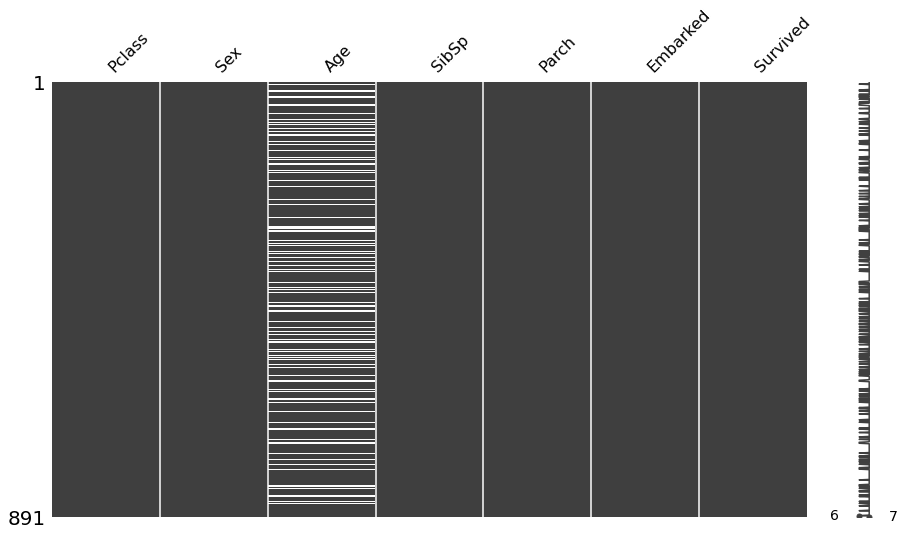

In [68]:
import missingno as msno
msno.matrix(input_data, figsize = (15,8))
# Age에 Null값 포함

In [69]:
input_data.columns[input_data.isna().any()].tolist()

['Age']

In [70]:

input_data_base = input_data.copy()  # 임시 저장 

In [71]:
# 결측치 처리
input_data = input_data.fillna(-1)  # nan -> -1

# 좋은 모델 xgb, lgbm, catboost 
# 결측치 알아서 처리

In [72]:
input_data.columns[input_data.isna().any()].tolist()

[]

In [73]:
# 1. 모델에 사용할 컬럼(column, feature) 결정 
# 2. 모델 입력 데이터 타입 변환 (numeric value 숫자 int, float)
# 3. 학습 데이터 준비

In [74]:
# 모델 학습
# 1. train data  학습
#      - train data
#      - validation data 학습 하는 도중에 실행하는 성능평가
# 2. test data   모델 성능 평가

In [75]:
#전체 데이터 20개
# 16개 -> train (12), validation (4) 
# 4개 -> test

In [76]:
# 데이터 -> train/valid  ,  test
from sklearn.model_selection import train_test_split

tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data[X_column],   # X 입력데이터
    input_data[y_column],   # y 정답데이터
    test_size=0.2,
    shuffle=True,
    random_state=42,
    stratify=input_data[y_column]   # classification 일때는 중요한 옵션
    )

In [77]:
tr_val_data = pd.concat([tr_val_X, tr_val_y], axis=1)
tr_val_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
692,3,1,-1.0,0,0,2,1
481,2,1,-1.0,0,0,2,0
527,1,1,-1.0,0,0,2,0
855,3,0,18.0,0,1,2,1
801,2,0,31.0,1,1,2,1
...,...,...,...,...,...,...,...
359,3,0,-1.0,0,0,1,1
258,1,0,35.0,0,0,0,1
736,3,0,48.0,1,3,2,0
462,1,1,47.0,0,0,2,0


In [78]:
# 데이터 -> train/valid  ,  test
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_data[X_column],   # X 입력데이터
    tr_val_data[y_column],   # y 정답데이터
    test_size=0.2,
    #train_size=13 # 데이터 개수
    shuffle=True,
    random_state=42,
    stratify=tr_val_data[y_column]   # classification 일때는 중요한 옵션
    )

In [79]:
print(len(train_X))
print(len(valid_X))
print(len(test_X))
len(train_X) + len(valid_X) + len(test_X) # 20

569
143
179


891

In [80]:
569 + 143 + 179

891

In [81]:
# classification 이슈
# 분석 -> 데이터 분포 중요

# Survived 분포 확인
# 0 사망 549명
# 1 생존 342명 
df[y_column].value_counts()  # unique() + nunique()

0    549
1    342
Name: Survived, dtype: int64

In [82]:
# 0 351명 사망
# 1 218명 생존
train_y.value_counts()

0    351
1    218
Name: Survived, dtype: int64

In [83]:
# 1. 모델에 사용할 컬럼(column, feature) 결정 
# 2. 모델 입력 데이터 타입 변환 (numeric value 숫자 int, float)
# 3. 학습 데이터 준비
# 4. 모델 학습

In [84]:
# Decision Tree, Random Forest, XGB, LGBM, CATBOOST

<AxesSubplot:>

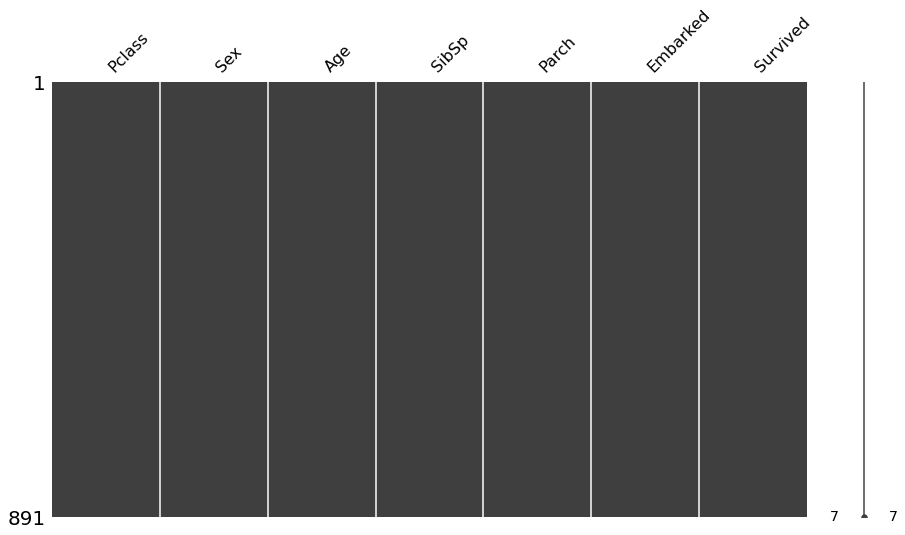

In [85]:
import missingno as msno
msno.matrix(input_data, figsize = (15,8))

In [86]:
input_data.columns[input_data.isna().any()].tolist()

[]

In [87]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Embarked
242,2,1,29.0,0,0,2
450,2,1,36.0,1,2,2
721,3,1,17.0,1,0,2
733,2,1,23.0,0,0,2
191,2,1,19.0,0,0,2
...,...,...,...,...,...,...
451,3,1,-1.0,1,0,2
289,3,0,22.0,0,0,1
819,3,1,10.0,3,2,2
812,2,1,35.0,0,0,2


In [88]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestRegressor()  classification
model_rf = RandomForestClassifier()
model_rf.fit(train_X, train_y)

RandomForestClassifier()

In [89]:
display(test_X, test_y)

,Pclass,Sex,Age,SibSp,Parch,Embarked
565,3,1,24.0,2,0,2
160,3,1,44.0,0,1,2
553,3,1,22.0,0,0,0
860,3,1,41.0,2,0,2
241,3,0,-1.0,1,0,1
...,...,...,...,...,...,...
880,2,0,25.0,0,1,2
91,3,1,20.0,0,0,2
883,2,1,28.0,0,0,2
473,2,0,23.0,0,0,0


565    0
160    0
553    1
860    0
241    1
      ..
880    1
91     0
883    0
473    1
637    0
Name: Survived, Length: 179, dtype: int64

In [90]:
true_y = test_y
true_y

565    0
160    0
553    1
860    0
241    1
      ..
880    1
91     0
883    0
473    1
637    0
Name: Survived, Length: 179, dtype: int64

In [91]:
# classification prediction (예측)
pred_y_prob = model_rf.predict_proba(test_X)
#pred_y = model_rf.predict(test_X)
pred_y_prob

array([[0.81708333, 0.18291667],
       [0.88133333, 0.11866667],
       [0.93      , 0.07      ],
       [0.98      , 0.02      ],
       [0.09702652, 0.90297348],
       [0.85      , 0.15      ],
       [0.16      , 0.84      ],
       [0.51166667, 0.48833333],
       [0.39      , 0.61      ],
       [0.93      , 0.07      ],
       [0.8854659 , 0.1145341 ],
       [0.86516667, 0.13483333],
       [0.085     , 0.915     ],
       [0.705     , 0.295     ],
       [0.42      , 0.58      ],
       [0.76422222, 0.23577778],
       [0.93      , 0.07      ],
       [0.96488109, 0.03511891],
       [0.98345238, 0.01654762],
       [0.03      , 0.97      ],
       [0.96488109, 0.03511891],
       [0.33      , 0.67      ],
       [0.67139286, 0.32860714],
       [0.42      , 0.58      ],
       [0.71725   , 0.28275   ],
       [0.        , 1.        ],
       [0.8854659 , 0.1145341 ],
       [0.65033333, 0.34966667],
       [0.80733333, 0.19266667],
       [1.        , 0.        ],
       [1.

In [92]:
pred_y = np.argmax(pred_y_prob, axis=1)
pred_y

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [93]:
df_result = pd.DataFrame(list(zip(test_y, pred_y)), columns=['true_y', 'pred_y'])
df_result

,true_y,pred_y
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
174,1,1
175,0,0
176,0,0
177,1,1


In [94]:
from sklearn.metrics import classification_report, confusion_matrix


# 사망한 데이터 를 잘 예측한 정도 0.85
# 생존한 데이터를 잘 예측한 정도 0.75


# 모델 정확도 0.82
# 사망한 데이터를 더 잘 예측한다 (0.85)


#0  90%, 1  85%, 2  65%, 3 10%


print(classification_report(true_y, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [95]:
confusion_matrix(true_y, pred_y)


     #        정답0   정답 1
     # 예측0    96    14
     # 예측1    19    50
     # ctrl + /

array([[94, 16],
       [19, 50]])

In [96]:
# 매출액 돈
# Regression
# Classfication 

In [97]:
# y                y2
# 0  `  100000     0
# 100000  100000   1
#  

In [98]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(learning_rate=0.1)
model_xgb.fit(train_X, train_y, eval_set=[(valid_X, valid_y)])

[11:16:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.64794
[1]	validation_0-logloss:0.61130
[2]	validation_0-logloss:0.58008
[3]	validation_0-logloss:0.55543
[4]	validation_0-logloss:0.53429
[5]	validation_0-logloss:0.51622
[6]	validation_0-logloss:0.50379
[7]	validation_0-logloss:0.49139
[8]	validation_0-logloss:0.48230
[9]	validation_0-logloss:0.47217
[10]	validation_0-logloss:0.46555
[11]	validation_0-logloss:0.45904
[12]	validation_0-logloss:0.45349
[13]	validation_0-logloss:0.44909
[14]	validation_0-logloss:0.44609
[15]	validation_0-logloss:0.44262
[16]	validation_0-logloss:0.44007
[17]	validation_0-logloss:0.43752
[18]	validation_0-logloss:0.43554
[19]	validation_0-logloss:0.43370
[20]	validation_0-logloss:0.43245
[21]	validation_0-logloss:0.43226
[22]	valid

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[65]	validation_0-logloss:0.44630
[66]	validation_0-logloss:0.44673
[67]	validation_0-logloss:0.44810
[68]	validation_0-logloss:0.44861
[69]	validation_0-logloss:0.44884
[70]	validation_0-logloss:0.44908
[71]	validation_0-logloss:0.44924
[72]	validation_0-logloss:0.44959
[73]	validation_0-logloss:0.45006
[74]	validation_0-logloss:0.45047
[75]	validation_0-logloss:0.45082
[76]	validation_0-logloss:0.45129
[77]	validation_0-logloss:0.45137
[78]	validation_0-logloss:0.45146
[79]	validation_0-logloss:0.45420
[80]	validation_0-logloss:0.45449
[81]	validation_0-logloss:0.45682
[82]	validation_0-logloss:0.45692
[83]	validation_0-logloss:0.45697
[84]	validation_0-logloss:0.45678
[85]	validation_0-logloss:0.45989
[86]	validation_0-logloss:0.46034
[87]	validation_0-logloss:0.46241
[88]	validation_0-logloss:0.46256
[89]	validation_0-logloss:0.46258
[90]	validation_0-logloss:0.46408
[91]	validation_0-logloss:0.46423
[92]	validation_0-logloss:0.46494
[93]	validation_0-logloss:0.46535
[94]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
# classification prediction (예측)
xgb_pred = model_xgb.predict(test_X)
#pred_y = model_rf.predict(test_X)
xgb_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

In [100]:

print(classification_report(true_y, xgb_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [101]:
# RandomFoest
# XGB 
# XGB


In [102]:
train_X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [103]:

model_rf.feature_importances_

array([0.14334149, 0.30437649, 0.36543211, 0.0716625 , 0.06942582,
       0.04576159])

In [104]:
pd.Series(model_rf.feature_importances_, index=train_X.columns).sort_values(ascending=False)

Age         0.365432
Sex         0.304376
Pclass      0.143341
SibSp       0.071663
Parch       0.069426
Embarked    0.045762
dtype: float64

In [105]:
pd.Series(model_xgb.feature_importances_, index=train_X.columns).sort_values(ascending=False)

Sex         0.696138
Pclass      0.155963
Parch       0.042434
Embarked    0.039146
Age         0.036113
SibSp       0.030206
dtype: float32

In [106]:
# categrory cls
# A    3
# A    3
# A    3
# B    1
# B    1
# C    5

